# Plot unsupervised target distributions

In [1]:
import pickle

In [2]:
import numpy as np
from sklearn.preprocessing import Normalizer, MinMaxScaler
from scipy.stats import skew
import scipy.stats as st

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.ticker import MaxNLocator

In [4]:
target_path = "../unsupervised_data/train/target.pkl"

In [15]:
with open(target_path, "rb") as f:
    data = pickle.load(f)
    data = np.array(data).reshape(-1, 1)

In [6]:
def plot(data):
    ax = sns.histplot(data)

    ax.set_xlabel("Similarity Score")
    ax.set_ylabel("Number of Pairs")
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Initial analysis

In [7]:
## Data has a positive skew
print(f"Data skew: {skew(data)[0]:.3f}")

Data skew: 1.115


# Loop through fit plots

/tmp/ipykernel_204251/3381654890.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=dist)


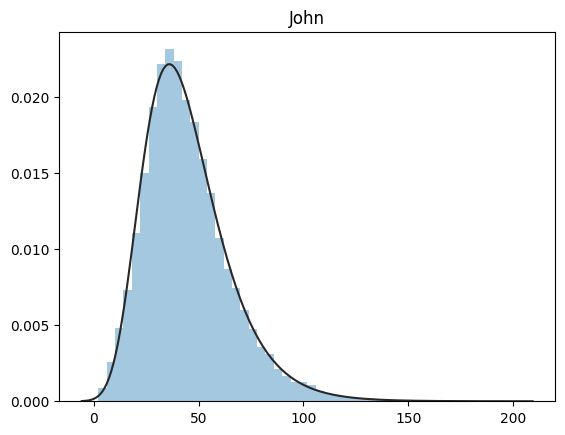

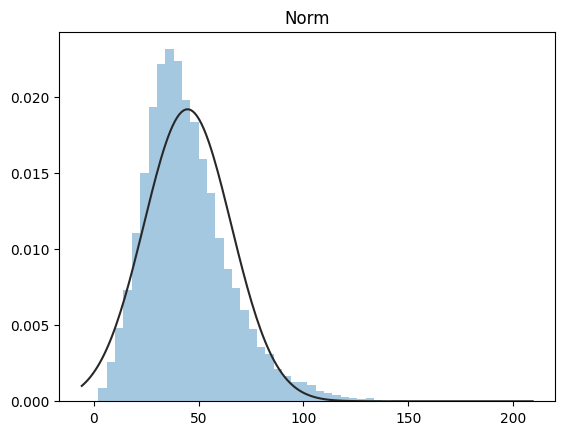

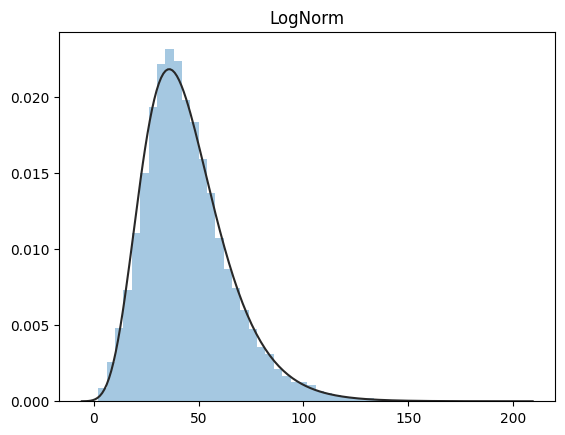

In [8]:


distribution = [('John', st.johnsonsu), 
                ('Norm', st.norm),
                ('LogNorm', st.lognorm)]
y = data

for i, (name, dist) in enumerate(distribution):
    plt.figure(1); plt.title(name)
    sns.distplot(y, kde=False, fit=dist)
    plt.show()

# Plot scaling variations

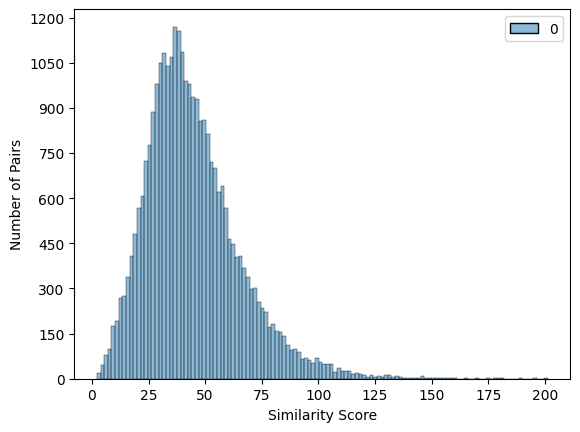

In [9]:
plot(data)

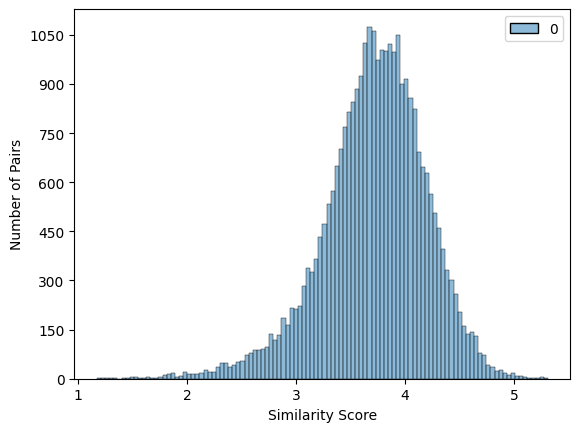

In [10]:
plot(np.log1p(data))

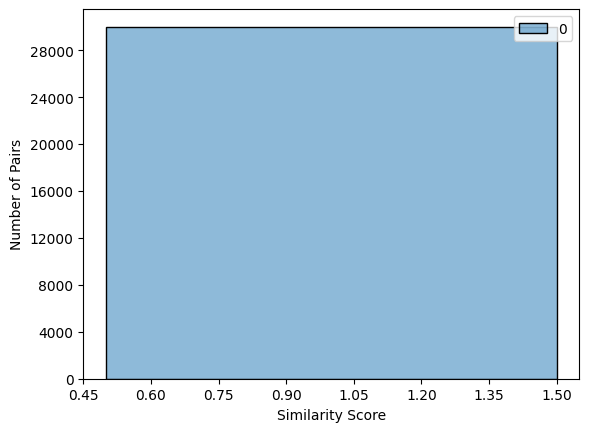

In [11]:
plot(Normalizer(norm='l2').fit_transform(data)) # Doesn't work - why? Only returns 1?

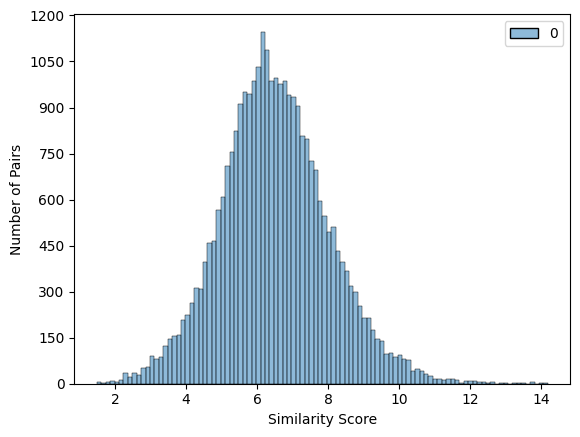

In [12]:
plot(np.sqrt(data))

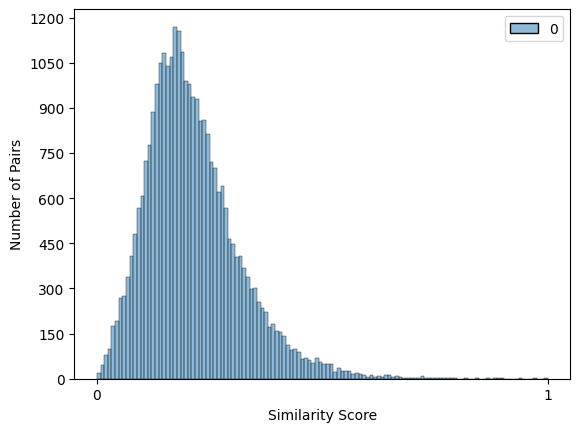

In [13]:
plot(MinMaxScaler().fit_transform(data.reshape(-1, 1)))

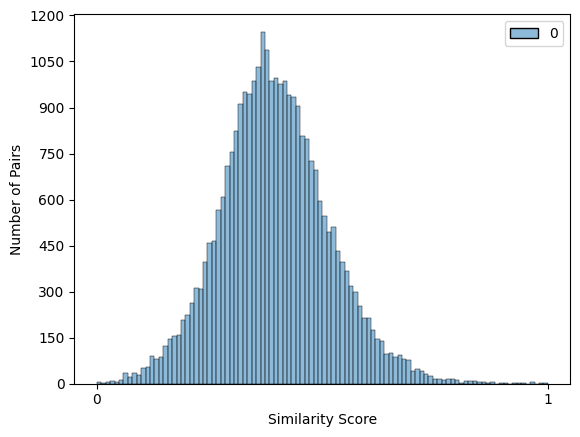

In [14]:
plot(MinMaxScaler().fit_transform(np.sqrt(data).reshape(-1, 1)))

In [17]:
MinMaxScaler().fit_transform(np.sqrt(data).reshape(-1, 1)).reshape(-1)

array([0.37730592, 0.30150488, 0.3658302 , ..., 0.531928  , 0.4357042 ,
       0.45757762], dtype=float32)

In [19]:
np.sqrt(data)

array([[6.283322 ],
       [5.3207498],
       [6.1375957],
       ...,
       [8.246816 ],
       [7.0249023],
       [7.3026657]], dtype=float32)